# Second Hand Car Price Prediction

# Objective:
 The objective of the "Second-hand Car Price Prediction" project is to develop a machine learning model capable of accurately predicting the price of second-hand cars based on various features and specifications of the vehicles.
 
**Datasource:** https://www.kaggle.com/datasets/sujithmandala/second-hand-car-price-prediction 


**Steps Taken**
- Reading the data in python
- Defining the problem statement
- Identifying the Target variable
- Looking at the distribution of Target variable
- Basic Data exploration
- Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
- Feature Selection based on data distribution
- Detecting and removing outliers, handling missing values.
- Visual correlation analysis
- Statistical correlation analysis (Feature Selection)
- Converting data to numeric for ML
- Sampling and K-fold cross validation
- Trying multiple Regression algorithms
- Selecting the best Model
- Deploying the best model in production


# The features available in the dataset are:-

- **Car_ID:** A unique identifier for each car listing.
- **Brand:** The brand or manufacturer of the car (e.g., Toyota, Honda, Ford, etc.).
- **Model:** The model of the car (e.g., Camry, Civic, Mustang, etc.).
- **Year:** The manufacturing year of the car.
- **Kilometers_Driven:** The total kilometers driven by the car.
- **Fuel_Type:** The type of fuel used by the car (e.g., Petrol, Diesel, Electric, etc.).
- **Transmission:** The transmission type of the car (e.g., Manual, Automatic).
- **Owner_Type:** The number of previous owners of the car (e.g., First, Second, Third).
- **Mileage:** The fuel efficiency of the car in kilometers per liter.
- **Engine:** The engine capacity of the car in CC (Cubic Centimeters).
- **Power:** The maximum power output of the car in bhp (Brake Horsepower).
- **Seats:** The number of seats available in the car.
- **Price:** The selling price of the car in INR (Indian Rupees), which is the target variable to predict.

In [108]:
# loading and reasing the dataset
import pandas as pd
import numpy as np
df=pd.read_csv("C:\\Users\\irosh\\Downloads\\cars.csv")
print('Original shape of the dataset:', df.shape)

# Removing duplicate rows 
df=df.drop_duplicates()
print('Shape after deleting duplicate values in the dataset:', df.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
df.head(10)

Original shape of the dataset: (100, 13)
Shape after deleting duplicate values in the dataset: (100, 12)


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
5,6,Tata,Nexon,2019,35000,Petrol,Manual,First,17,1198,108,5,750000
6,7,Mahindra,Scorpio,2018,45000,Diesel,Automatic,Second,15,2179,140,7,900000
7,8,Volkswagen,Polo,2020,25000,Petrol,Automatic,First,18,999,76,5,650000
8,9,Audi,A4,2017,30000,Diesel,Automatic,First,18,1968,187,5,2200000
9,10,BMW,X1,2019,20000,Diesel,Automatic,Second,20,1995,190,5,2700000


In [3]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

# Basic Data Exploration
This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

For basic statistical summary we use the following functions: 

- **head() :** This helps to see a few sample rows of the data
- **info() :** This provides the summarized information of the data
- **describe() :**  This provides the descriptive statistical details of the data
- **nunique() :** This helps us to identify if a column is categorical or continuous

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [10]:
# Descriptive Statistics
df.describe(include='all')

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,100.000000,100,100,100.00000,100.000000,100,100,100,100.000000,100.000000,100.000000,100.000000,1.000000e+02
unique,NaN,11,58,NaN,NaN,2,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,Ford,Mustang,NaN,NaN,Petrol,Automatic,First,NaN,NaN,NaN,NaN,NaN
freq,NaN,11,3,NaN,NaN,52,57,44,NaN,NaN,NaN,NaN,NaN
mean,50.500000,NaN,NaN,2018.39000,28150.000000,NaN,NaN,NaN,17.210000,1855.230000,158.130000,5.230000,1.574000e+06
std,29.011492,NaN,NaN,1.17116,9121.375716,NaN,NaN,NaN,3.309902,631.311475,76.968137,0.750151,1.000265e+06
min,1.000000,NaN,NaN,2016.00000,10000.000000,NaN,NaN,NaN,10.000000,999.000000,68.000000,4.000000,4.500000e+05
25%,25.750000,NaN,NaN,2017.75000,22000.000000,NaN,NaN,NaN,15.000000,1462.000000,103.000000,5.000000,7.000000e+05
50%,50.500000,NaN,NaN,2018.00000,27000.000000,NaN,NaN,NaN,17.000000,1774.000000,148.000000,5.000000,1.300000e+06
75%,75.250000,NaN,NaN,2019.00000,32000.000000,NaN,NaN,NaN,19.000000,2143.000000,187.000000,5.000000,2.500000e+06


In [12]:

df.nunique()

Car_ID               100
Brand                 11
Model                 58
Year                   6
Kilometers_Driven     18
Fuel_Type              2
Transmission           2
Owner_Type             3
Mileage               15
Engine                36
Power                 40
Seats                  3
Price                 31
dtype: int64

# Looking at the distribution of Target variable
If target variable's distribution is too skewed then the predictive modeling will not be possible.
Bell curve is desirable but slightly positive skew or negative skew is also fine
When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.If the target variable's distribution is highly skewed, it can hinder the effectiveness of predictive modeling. Ideally, a bell-shaped distribution is preferred, but a distribution with a slight positive or negative skew is also acceptable. When performing regression, it's important to ensure that the histogram of the target variable resembles a bell curve or a slightly skewed version of it. If the distribution is too skewed, it can negatively impact the machine learning algorithm's ability to accurately learn and generalize from the data.









<Axes: >

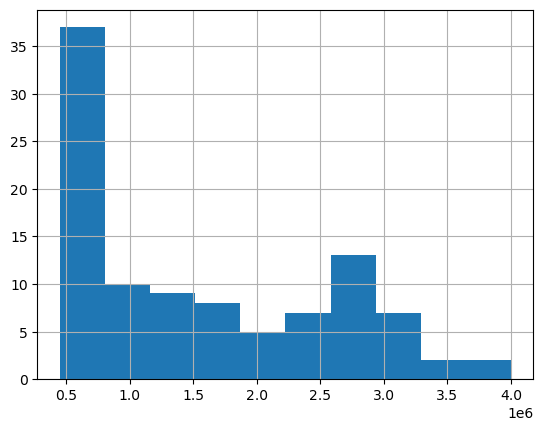

In [14]:
%matplotlib inline
# Bar chart
df['Price'].hist()

In [17]:
df=df.drop(['Model','Car_ID'], axis=1)
df.head()

,Brand,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Toyota,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,Honda,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,Ford,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,Maruti,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,Hyundai,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [703]:
df.nunique()

Brand                11
Year                  6
Kilometers_Driven    18
Fuel_Type             2
Transmission          2
Owner_Type            3
Mileage              15
Engine               36
Power                40
Seats                 3
Price                31
dtype: int64

# Basic Data Exploration Results


Based on the initial data exploration, a simple report can be created by noting observations for each column, thereby establishing an initial roadmap for further analysis.

At this stage, the selected columns are not final; further analysis will be conducted to refine the list.

**Categorical Variables:**  
- *Brand, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Seats*

**Continuous Variables:**  
- *Power, Engine, Price*

**Visual Exploratory Data Analysis:**
- For categorical variables, bar plots will be used.
- For continuous variables, histograms will be used.

To visualize the distribution of all the categorical predictor variables in the data, bar plots will be employed. Categorical variables can be identified by examining their unique values. Typically, a categorical variable has fewer than 20 unique values and shows repetition, indicating that the data can be grouped by these unique values.

From the basic data exploration, six categorical predictors have been identified:

**Categorical Predictors:**  
- *Brand, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Seats*

Bar charts will be used to visualize how the data is distributed across these categorical columns.

In [21]:
# The PlotBarCharts function allows you to generate bar charts for multiple categorical columns in one go. 
# Each column in the colsToPlot list will have its own subplot within a larger figure.


def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=len(colsToPlot), ncols=1, figsize=(10,60))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
       df.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

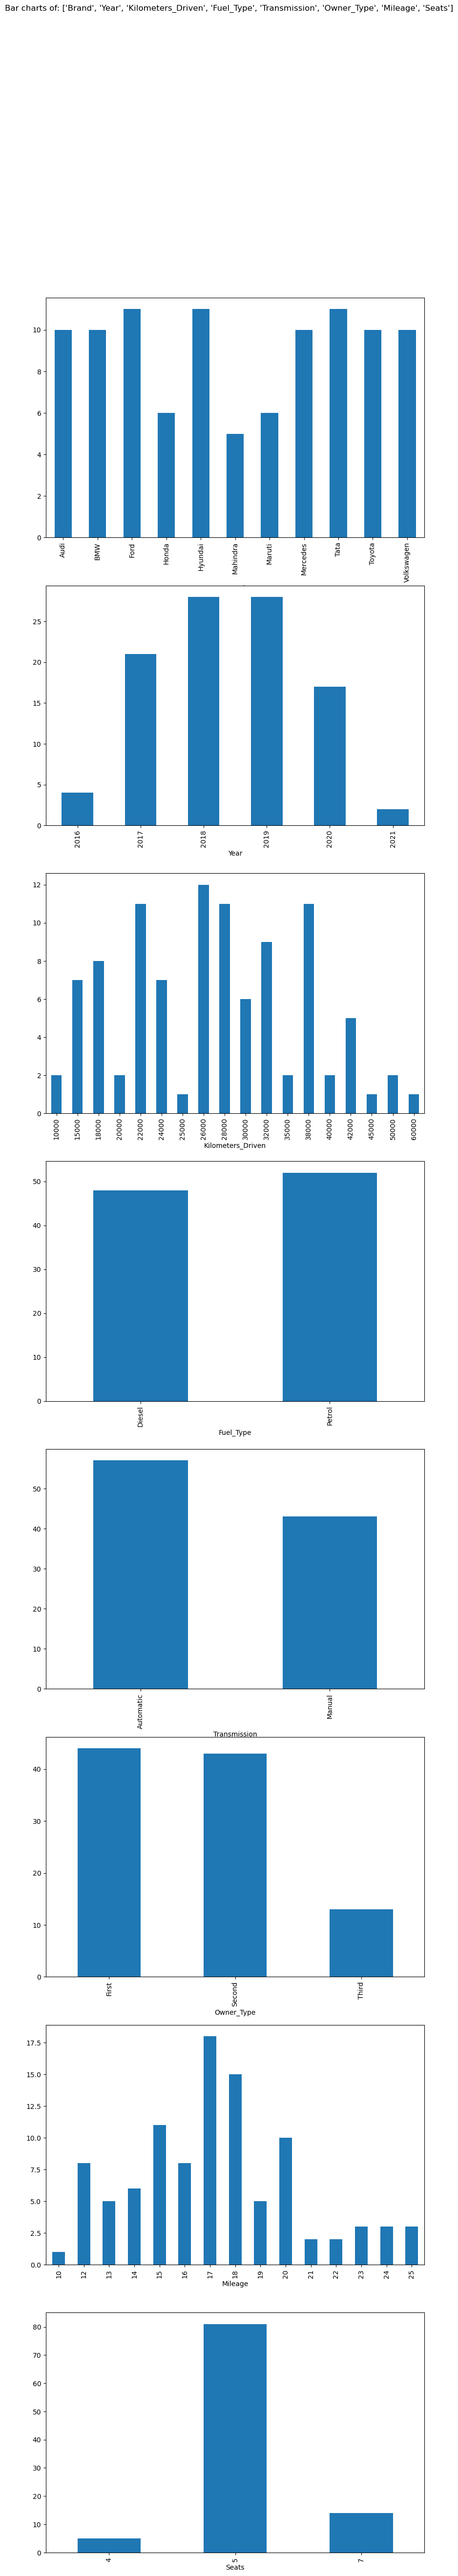

In [23]:
# Calling the function
PlotBarCharts(inpData=df, colsToPlot=[ 'Brand', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Seats'])

# Bar Charts Interpretation

These bar charts display the frequencies of each category on the Y-axis and the category names on the X-axis.

In an ideal bar chart, each category should have a comparable frequency, indicating that there are sufficient data points for each category for the machine learning algorithm to learn effectively.

However, if a bar chart reveals a highly skewed distribution, where one category is overwhelmingly dominant and the other categories are represented by very few data points, such columns may not be very useful for machine learning. This will be further confirmed during the correlation analysis, where a final decision will be made on whether to retain or discard the column.

**Selected Categorical Variables:**  
All the categorical variables are selected for further analysis:
- *Brand, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Seats*

# Visualizing distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, Three continuous predictor variables Power,Engine, Price

array([[<Axes: title={'center': 'Power'}>,
        <Axes: title={'center': 'Engine'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

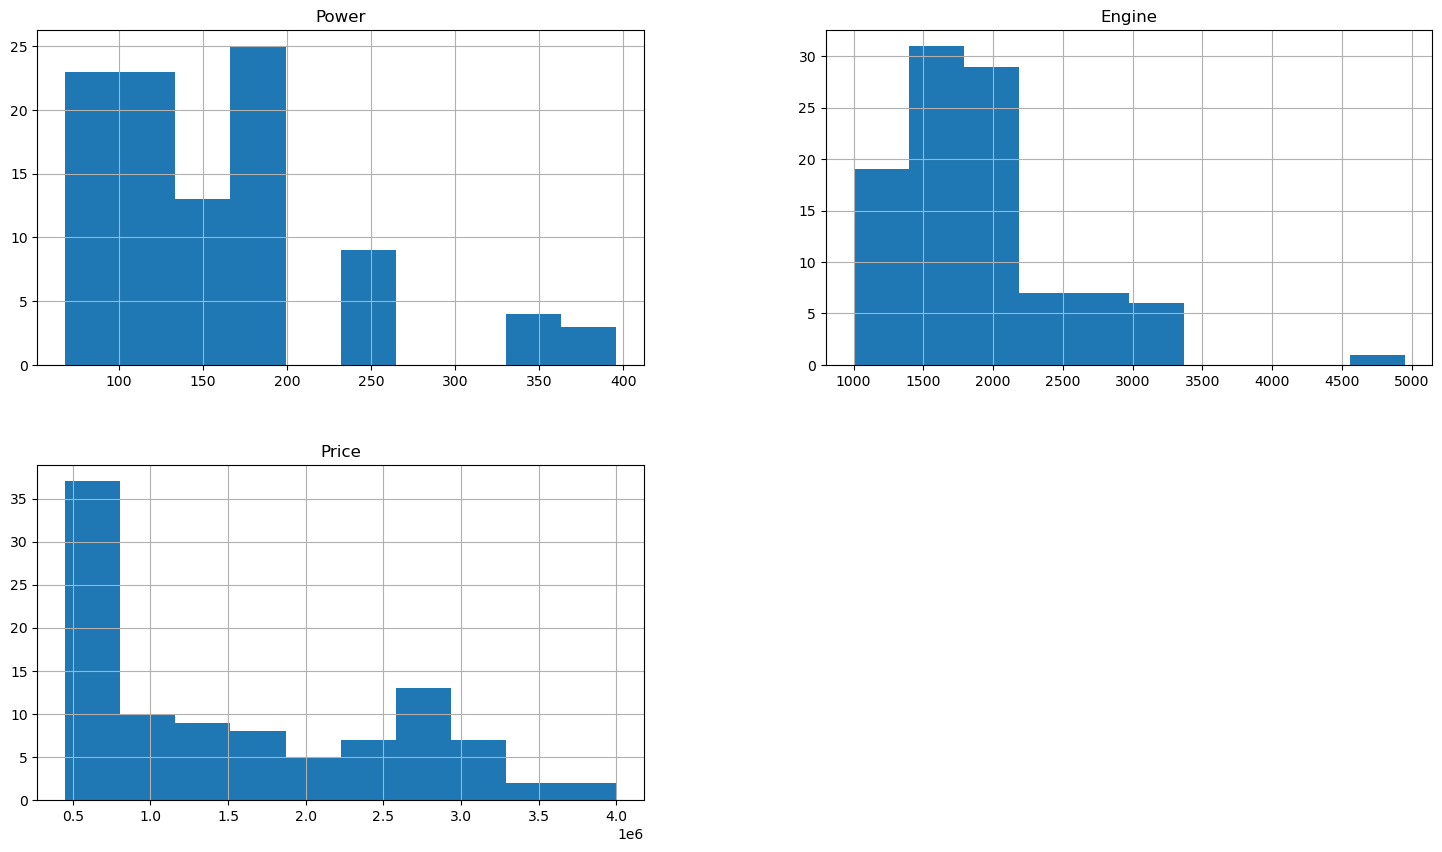

In [27]:
# Plotting histograms of multiple columns together
df.hist(['Power','Engine', 'Price'], figsize=(18,10))

### Histogram Interpretation

Histograms help visualize the distribution of data for a single continuous variable.

The X-axis represents the range of values, while the Y-axis indicates the frequency of values within that range. For example, in the histogram for "Rating," approximately 120 rows have values between 4 and 5.

The ideal shape for a histogram is a bell curve or a slightly skewed bell curve. If the distribution is excessively skewed, it indicates the presence of outliers, which should be treated. If outlier treatment does not correct the skewness, the column should be reconsidered, and only if necessary, should it be rejected.

**Selected Continuous Variables:**

- **Power:** Selected. The distribution is satisfactory.
- **Engine:** Selected. Outliers are observed beyond 3500; these need to be addressed.
- **Price:** Selected. The distribution is satisfactory.

**Outlier Treatment:**  
Outliers are extreme values that deviate significantly from the rest of the data, often appearing as tails in the histogram.

Outliers should be treated one column at a time, as the appropriate treatment may vary for each column.

**Why Address Outliers?**  
Outliers can bias the training of machine learning models. As the algorithm attempts to accommodate these extreme values, it may deviate from accurately modeling the majority of the data.

There are two primary methods to handle outliers:

1. **Option 1: Remove Outlier Records:** This is feasible if only a few rows are affected.
2. **Option 2: Impute Outlier Values:** Replace outliers with a logical, business-relevant value. To determine the most appropriate replacement value, examine the histogram of the variable.

In this case, we will treat the outliers in the "Engine" column.

In [30]:
# Counting the number of rows having outliers
len(df['Engine'][df['Engine']>3500])

1

In [32]:
# Finding logical value near 3500
df['Engine'][df['Engine']<3500].sort_values(ascending=False)

47    2998
85    2998
38    2996
76    2996
75    2993
      ... 
79    1086
41    1086
42    1047
80    1047
7      999
Name: Engine, Length: 99, dtype: int64

In [34]:
df['Engine'][df['Engine']>3500]=2998

array([[<Axes: title={'center': 'Engine'}>]], dtype=object)

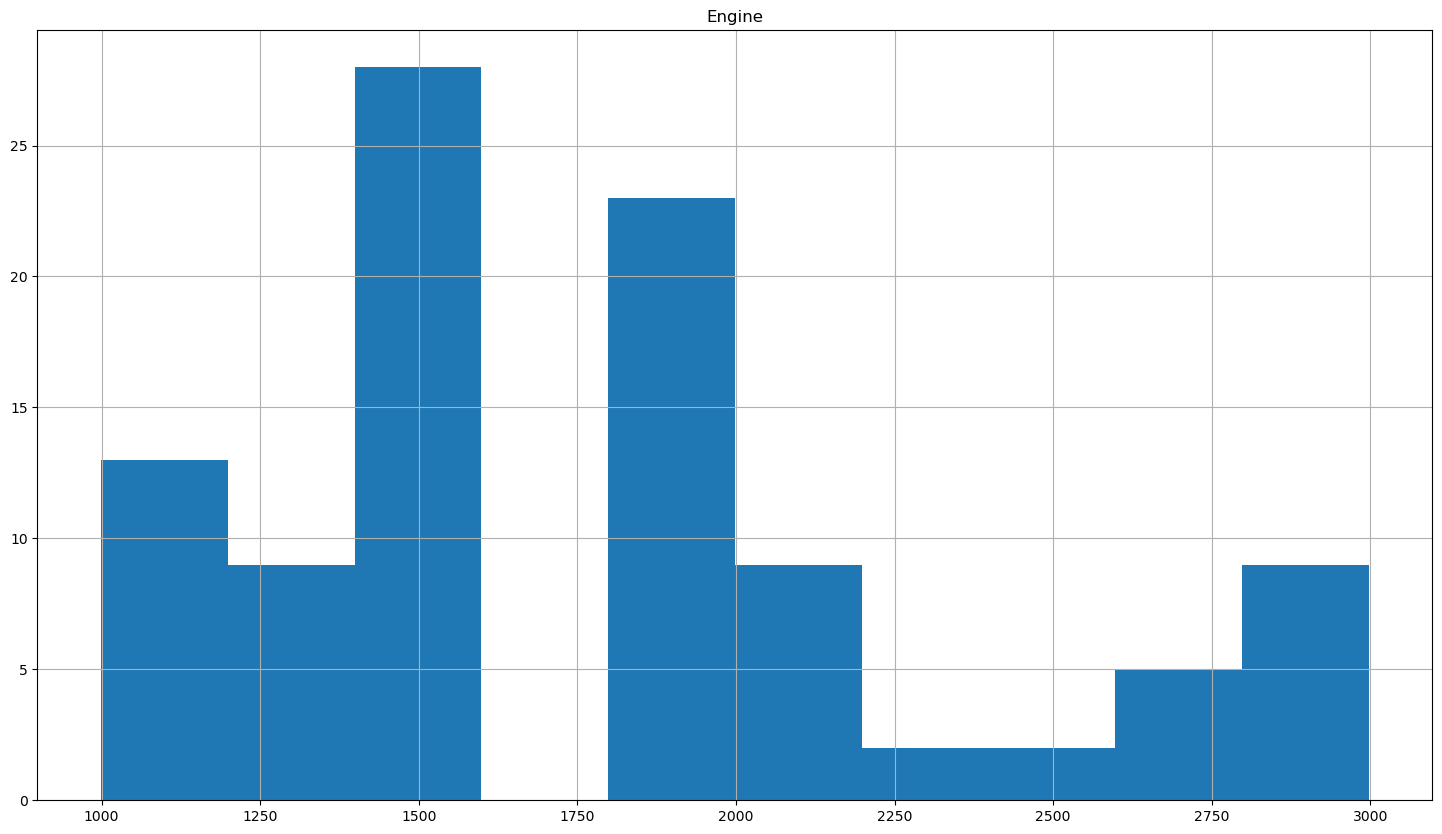

In [36]:
df.hist(['Engine'], figsize=(18,10))

Brand                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


<Axes: >

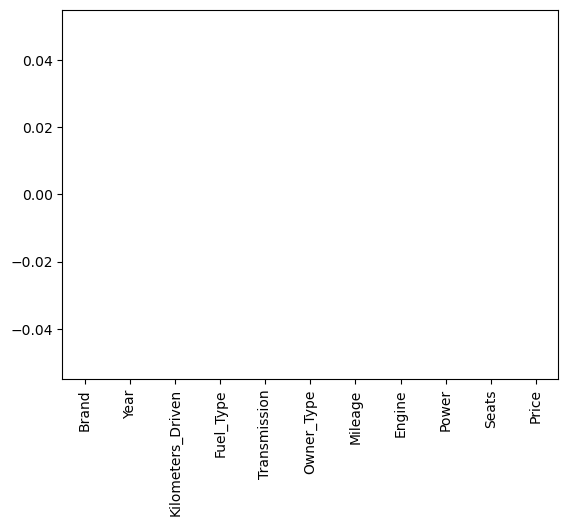

In [38]:
# Finding how many missing values are there for each column
print(df.isnull().sum())
df.isnull().sum().plot(kind='bar') 

## Feature Selection (Bi-Variate analysis)
Now, it's time to finalize the selection of the best features (columns) that are most strongly correlated with the target variable. This can be achieved by directly measuring correlation values or through statistical tests like ANOVA or Chi-Square. However, it's also beneficial to visualize the relationship between the target variable and each predictor to gain a better understanding of the data.

Below are the techniques used for visualizing the relationship between two variables, as well as methods for statistically measuring the strength of their relationship:

**Visual Exploration of Relationships Between Variables:**
- **Continuous vs. Continuous:** Scatter Plot
- **Categorical vs. Continuous:** Box Plot
- **Categorical vs. Categorical:** Grouped Bar Plots

**Statistical Measurement of Relationship Strength:**
- **Continuous vs. Continuous:** Correlation Matrix
- **Categorical vs. Continuous:** ANOVA Test
- **Categorical vs. Categorical:** Chi-Square Test

In this case study, the target variable is continuous, so the following scenarios will be relevant:

1. **Continuous Target Variable vs. Continuous Predictor**
2. **Continuous Target Variable vs. Categorical Predictor**

## Relationship exploration: Continuous Vs Continuous -- Scatter Charts

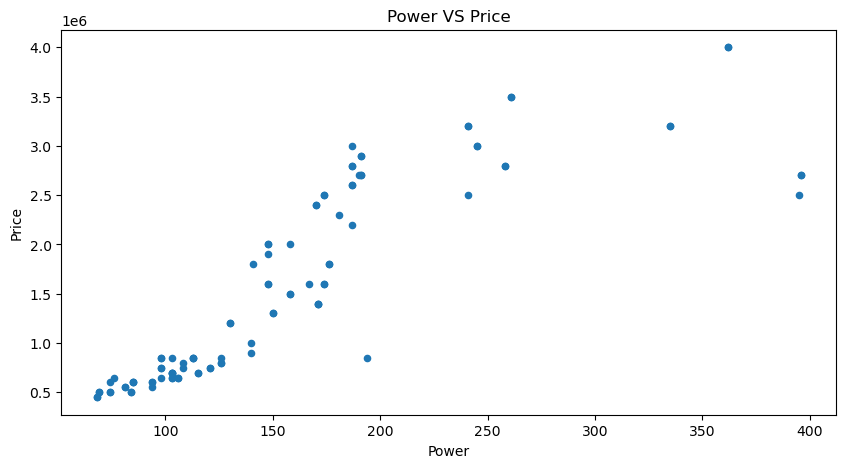

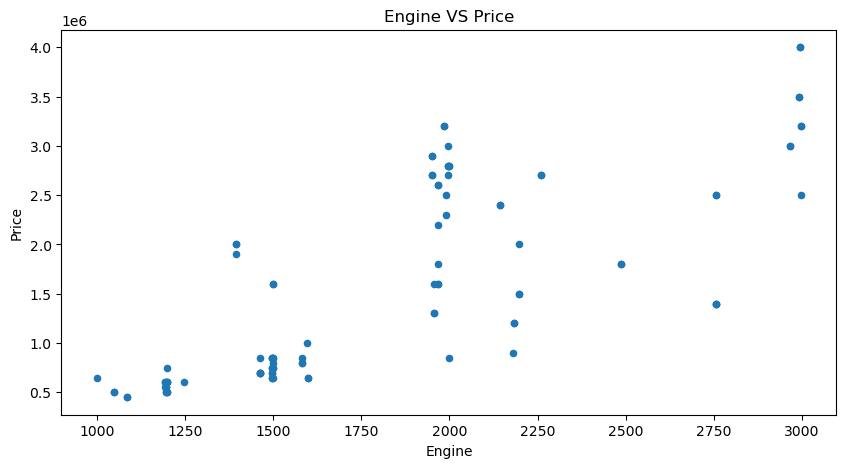

In [41]:
ContinuousCols=['Power', 'Engine']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    df.plot.scatter(x=predictor, y='Price', figsize=(10,5), title=predictor+" VS "+ 'Price')

### Interpreting Scatter Charts: What to Look For

When analyzing scatter charts, the primary focus should be on identifying any visible trends between the two variables. There are three potential scenarios to consider:

1. **Increasing Trend:**  
   - If the scatter plot shows an upward trend, it indicates a positive correlation between the variables. In simpler terms, as one variable increases, the other also increases. This positive relationship is beneficial for machine learning, as it suggests that the predictor is likely to be useful.

2. **Decreasing Trend:**  
   - If the scatter plot displays a downward trend, it indicates a negative correlation between the variables. In this case, as one variable increases, the other decreases. This inverse relationship is also advantageous for machine learning, as it implies that the predictor has a meaningful impact.

3. **No Trend:**  
   - If the scatter plot shows no clear upward or downward trend, it suggests that there is no significant correlation between the variables. Without a discernible relationship, the predictor may not be useful for machine learning purposes.

By examining these scatter charts, you can gain valuable insights into whether a predictor is likely to be effective. To confirm your observations, you should also check the correlation value between the variables.

# Statistical Feature Selection
To evaluate the relationship between continuous features, Pearson's correlation coefficient can be used. It is computed as the covariance between two features, \(x\) and \(y\) (numerator), divided by the product of their standard deviations (denominator).

This measure is applicable only for numeric columns. Here’s what the correlation values indicate:

- **Correlation between \([-1,0)\)**: Indicates an inverse relationship; the scatter plot will show a downward trend.
- **Correlation between \((0,1]\)**: Indicates a direct relationship; the scatter plot will show an upward trend.
- **Correlation near \(\{0\}\)**: Suggests no significant relationship; the scatter plot will not show a clear trend.

A correlation value with an absolute magnitude greater than \(0.5\) suggests a strong relationship, regardless of the sign. By examining the correlations between the target variable and other predictor variables, we can identify which features are significantly related to the target variable.

In [46]:
# Calculating correlation matrix
ContinuousCols=['Engine','Power', 'Price']

# Creating the correlation matrix
CorrelationData=df[ContinuousCols].corr()
CorrelationData


,Engine,Power,Price
Engine,1.000000,0.798683,0.771661
Power,0.798683,1.000000,0.856620
Price,0.771661,0.856620,1.000000


### Engine and Power is corelated with price

Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots and measure the strength of relation using Anova test

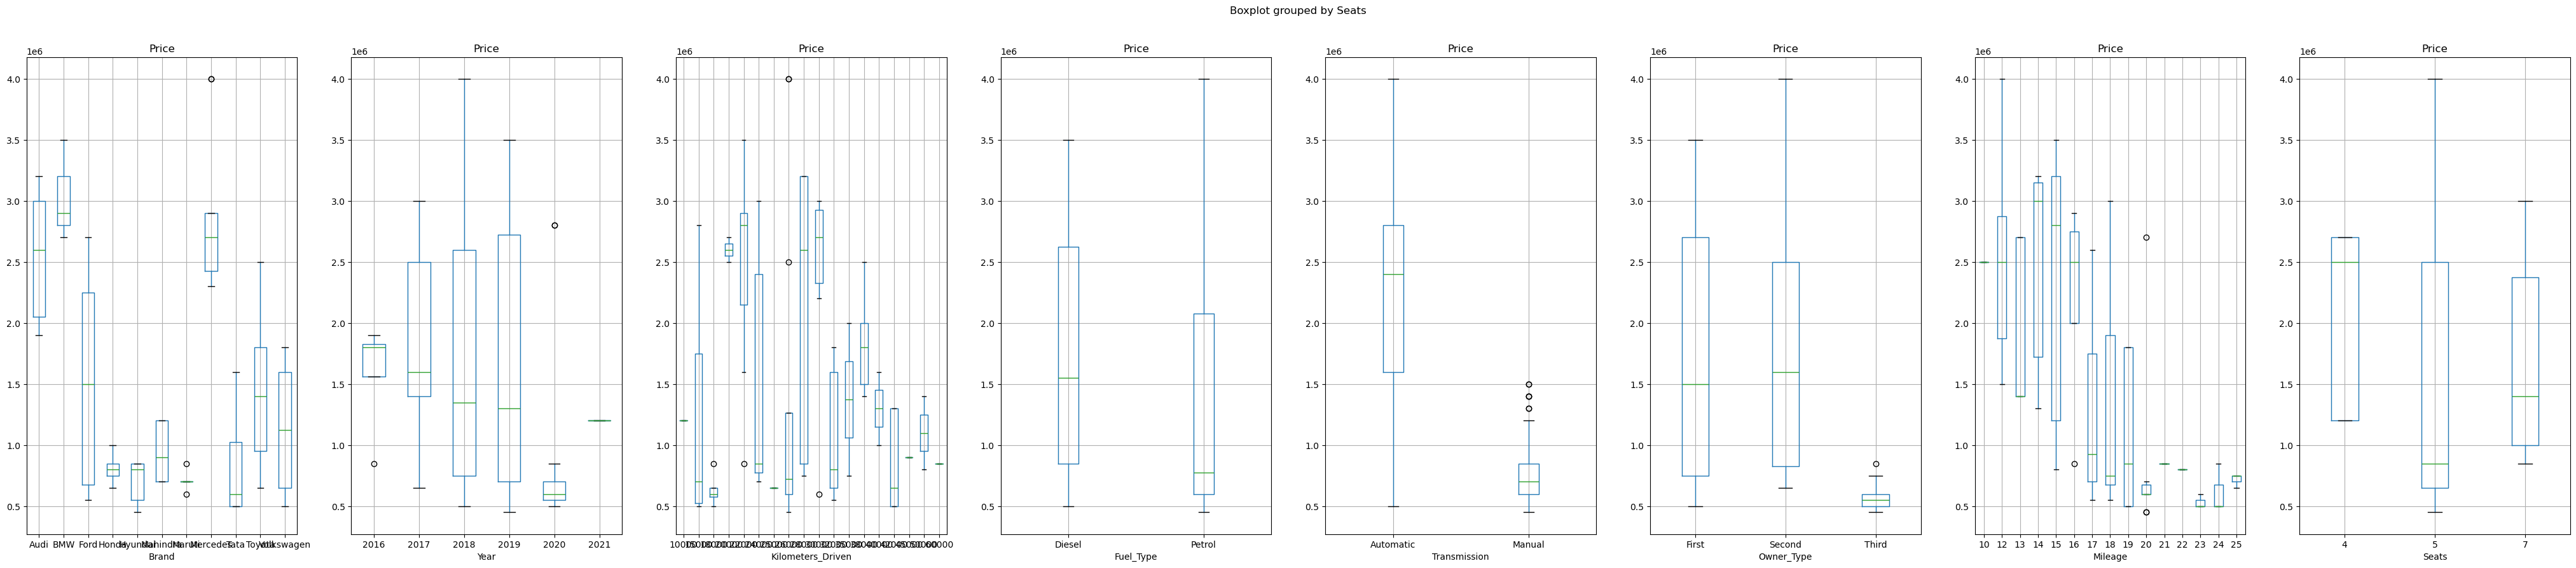

In [50]:
# Box plots for Categorical Target Variable "Price" and continuous predictors
CategoricalColsList=['Brand', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Seats']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(50,10))

# Creating box plots for each continuous predictor against the Target Variable "Price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
   df.boxplot(column='Price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

# Box-Plots interpretation
In box plots, we examine the distribution of a continuous predictor variable (on the Y-axis) across different categories (on the X-axis).

- **If the distributions appear similar across categories (the boxes align horizontally)**, this suggests that the continuous variable has little to no effect on the target variable, indicating that the variables may not be correlated.

- **Conversely, if the distributions differ across categories (the boxes are not aligned)**, it suggests that the continuous variable might be correlated with the target variable.

In this dataset, most categorical predictors appear to be correlated with the target variable, except for "Fueltype," "Automatic," and "MetColor," which seem less correlated as their boxes are closer together. This observation is further supported by the results of the ANOVA test.

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

Analysis of Variance (ANOVA) is used to determine whether there is a significant relationship between a continuous variable and a categorical variable.

**Assumption (H0)**: There is no relationship between the variables, meaning the average (mean) values of the continuous target variable are the same across all groups of the categorical predictor variable.

**ANOVA Test Result**: Indicates the probability of the null hypothesis (H0) being true.

In [54]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            # Accepting the H0 if the P value is more than 0.05
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [56]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['Brand', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Seats']
FunctionAnova(inpData=df, 
              TargetVariable='Price', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Brand is correlated with Price | P-Value: 1.7325717435533267e-23
Year is correlated with Price | P-Value: 0.048187072917192694
Kilometers_Driven is correlated with Price | P-Value: 0.000638336916775814
Fuel_Type is NOT correlated with Price | P-Value: 0.07157824443581828
Transmission is correlated with Price | P-Value: 1.123170161794828e-14
Owner_Type is correlated with Price | P-Value: 0.00046475357674379464
Mileage is correlated with Price | P-Value: 2.531870039021753e-06
Seats is NOT correlated with Price | P-Value: 0.4890365189394963


['Brand', 'Year', 'Kilometers_Driven', 'Transmission', 'Owner_Type', 'Mileage']

Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [59]:
SelectedColumns=['Brand', 'Year', 'Kilometers_Driven', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power']

# Selecting final columns
DataForML=df[SelectedColumns]
DataForML.head()

,Brand,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power
0,Toyota,2018,50000,Manual,First,15,1498,108
1,Honda,2019,40000,Automatic,Second,17,1597,140
2,Ford,2017,20000,Automatic,First,10,2998,395
3,Maruti,2020,30000,Manual,Third,23,1248,74
4,Hyundai,2016,60000,Automatic,Second,18,1999,194


In [61]:
import os
os.getcwd()

'C:\\Users\\irosh\\Downloads'

In [63]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [65]:
# Reading a pickle file
import pandas as pd
DataForML=pd.read_pickle('DataForML.pkl')
DataForML.head()
DataForML.nunique()

Brand                11
Year                  6
Kilometers_Driven    18
Transmission          2
Owner_Type            3
Mileage              15
Engine               35
Power                40
dtype: int64

In [67]:
DataForML.replace({'First':1, 'Second':2, 'Third':3}, inplace=True)
DataForML

,Brand,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power
0,Toyota,2018,50000,Manual,1,15,1498,108
1,Honda,2019,40000,Automatic,2,17,1597,140
2,Ford,2017,20000,Automatic,1,10,2998,395
3,Maruti,2020,30000,Manual,3,23,1248,74
4,Hyundai,2016,60000,Automatic,2,18,1999,194
...,...,...,...,...,...,...,...,...
95,Mercedes,2019,22000,Automatic,1,16,1950,191
96,Toyota,2017,38000,Manual,2,13,2755,171
97,Ford,2018,26000,Manual,3,18,1497,121
98,Hyundai,2019,24000,Automatic,2,17,1497,113


### Data Pre-processing for Machine Learning

Here are the steps performed on predictor variables to prepare the data for machine learning:

1. Convert ordinal categorical columns to numeric values.
2. Convert binary nominal categorical columns to numeric values using a 1/0 mapping.
3. Convert other nominal categorical columns to numeric values using `pd.get_dummies()`.
4. Data Transformation (Optional): Apply standardization, normalization, logarithmic, or square root transformations. This is important for distance-based algorithms like KNN or neural networks.

In this dataset, there are no ordinal categorical variables in string format to convert. Similarly, there are no binary nominal variables in string format that need to be converted using 1/0 mapping.

## Converting the nominal variable to numeric using get_dummies()

In [71]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML, dtype=int)
# Adding Target Variable to the data
DataForML_Numeric['Price']=df['Price']

# Printing sample rows
DataForML_Numeric.head()


,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Transmission_Automatic,Transmission_Manual,Price
0,2018,50000,1,15,1498,108,0,0,0,0,0,0,0,0,0,1,0,0,1,800000
1,2019,40000,2,17,1597,140,0,0,0,1,0,0,0,0,0,0,0,1,0,1000000
2,2017,20000,1,10,2998,395,0,0,1,0,0,0,0,0,0,0,0,1,0,2500000
3,2020,30000,3,23,1248,74,0,0,0,0,0,0,1,0,0,0,0,0,1,600000
4,2016,60000,2,18,1999,194,0,0,0,0,1,0,0,0,0,0,0,1,0,850000


### Machine Learning: Splitting the Data into Training and Testing Sets

In machine learning, the entire dataset is not used for building the model. Instead, a portion of the data is reserved for evaluating the model's performance. This reserved portion is called the Testing Data, while the remaining data is used to train the model and is referred to as the Training Data. Typically, 70% of the data is allocated for training, and the remaining 30% is set aside for testing.

In [74]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Year', 'Kilometers_Driven', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Brand_Audi', 'Brand_BMW', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes', 'Brand_Tata',
       'Brand_Toyota', 'Brand_Volkswagen', 'Transmission_Automatic',
       'Transmission_Manual', 'Price'],
      dtype='object')

In [76]:
# Separate Target Variable and Predictor Variables
TargetVariable='Price'
Predictors=['Year', 'Kilometers_Driven', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Brand_Audi', 'Brand_BMW', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes', 'Brand_Tata',
       'Brand_Toyota', 'Brand_Volkswagen', 'Transmission_Automatic',
       'Transmission_Manual']


X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=41)

# Quick check on the shapes of train and test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(70, 19)
(70,)
(30, 19)
(30,)


In [78]:
# Suppressing Scientific Notation in printing numpy arrays
np.set_printoptions(suppress=True)
X_train[0:10]

array([[ 2020, 25000,     1,    18,   999,    76,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     1,     1,
            0],
       [ 2017, 32000,     2,    17,  1968,   174,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     1,     1,
            0],
       [ 2017, 35000,     2,    12,  2198,   158,     0,     0,     1,
            0,     0,     0,     0,     0,     0,     0,     0,     1,
            0],
       [ 2018, 26000,     2,    12,  2996,   362,     0,     0,     0,
            0,     0,     0,     0,     1,     0,     0,     0,     1,
            0],
       [ 2019, 22000,     2,    18,  1498,   148,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     1,     1,
            0],
       [ 2018, 38000,     2,    12,  2755,   174,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     1,     0,     1,
            0],
       [ 2020, 18000,     1,    23,  1199,    84,   

In [80]:
y_train[0:10]

array([ 650000, 1600000, 2000000, 4000000, 1600000, 2500000,  500000,
       2700000,  650000,  850000], dtype=int64)

### Standardization/Normalization of Data

Standardization or normalization of data may be optional if you wish to compare the accuracy of the transformed data against the accuracy of the raw data.

However, this step is essential when using algorithms that are sensitive to the scale of the data, such as K-Nearest Neighbors (KNN) or Neural Networks. Standardization typically involves rescaling data to have a mean of 0 and a standard deviation of 1, while normalization scales the data to a specific range, often [0,1]. Proper scaling ensures that features contribute equally to the model, which can significantly improve performance and convergence speed for these algorithms.


In [83]:
# Sandardization of data 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose between Standardization and Min-Max Normalization

# Min-Max Normalization Outperforms Standardization on This Data
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Finding and storing Min and Max values for every column in X
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Splitting the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [85]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(70, 19)
(70,)
(30, 19)
(30,)


In [87]:
X_train[0:10]


array([[0.8       , 0.3       , 0.        , 0.53333333, 0.        ,
        0.02439024, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 1.        , 0.        ],
       [0.2       , 0.44      , 0.5       , 0.46666667, 0.48474237,
        0.32317073, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 1.        , 0.        ],
       [0.2       , 0.5       , 0.5       , 0.13333333, 0.5997999 ,
        0.27439024, 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.4       , 0.32      , 0.5       , 0.13333333, 0.9989995 ,
        0.89634146, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.   

In [89]:
y_train[0:10]

array([ 650000, 1600000, 2000000, 4000000, 1600000, 2500000,  500000,
       2700000,  650000,  850000], dtype=int64)

# Multiple Linear Regression

In [92]:
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)



from sklearn import metrics
# Evaluating Model Performance on Training Data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

print('\n__________ Model Validation and Accuracy Calculations ___________')

# Printing sample values of prediction
prediction=LREG.predict(X_test)
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable, 'APE']].head())


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) 
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function 
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation 
Accuracy_Values=cross_val_score(RegModel, X , y, cv=5, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.9562841473111522

##### Model Validation and Accuracy Calculations ##########
   Year  Kilometers_Driven  Owner_Type   Mileage    Engine     Power  \
0   0.4               0.64         0.0  0.933333  0.024012  0.003049   
1   0.8               0.10         0.5  0.333333  0.499750  0.579268   
2   0.6               0.24         0.0  0.333333  0.997499  0.588415   
3   0.4               0.70         0.5  0.333333  0.590295  0.219512   
4   0.6               0.32         1.0  0.666667  0.043522  0.000000   

   Brand_Audi  Brand_BMW  Brand_Ford  Brand_Honda  ...  Brand_Mahindra  \
0         0.0        0.0         0.0          0.0  ...             0.0   
1         0.0        1.0         0.0          0.0  ...             0.0   
2         0.0        1.0         0.0          0.0  ...             0.0   
3         0.0        0.0         0.0          0.0  ...             1.0   
4         0.0        0.0         0.0          0.0  ...             0.0   

   Brand_Maru

### Accuracy of the Multiple Linear Regression Model is 79.57%

In [95]:
df['PriceAVG']=TestingDataResults['Price'].mean()
df.head()

,Brand,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,PriceAVG
0,Toyota,2018,50000,Petrol,Manual,First,15,1498,108,5,800000,1595000.0
1,Honda,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000,1595000.0
2,Ford,2017,20000,Petrol,Automatic,First,10,2998,395,4,2500000,1595000.0
3,Maruti,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000,1595000.0
4,Hyundai,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000,1595000.0


In [97]:
LREG.coef_

array([ 281762.30620611,   28539.15009728,  -96902.79257565,
       -280554.73441969,  921463.93788836, 1291205.13290919,
        736362.25360194,  678156.86310923, -158463.44420886,
       -178657.39875048, -374066.4227157 , -398250.90612763,
       -366565.48234554,  837345.35903773, -229771.41406273,
       -362917.5896203 , -183171.81791765,  105369.80847793,
       -105369.80847793])

In [99]:
LREG.intercept_

785703.0138457348

# Decision Trees

DecisionTreeRegressor(max_depth=3)
R2 Value: 0.9630338230459485

##### Model Validation and Accuracy Calculations ##########
     Price  PredictedPrice
0   500000        553846.0
1  2800000       2750000.0
2  3500000       3580000.0
3   900000        786364.0
4   450000        553846.0
Mean Accuracy on test data: 84.58951071382754
Median Accuracy on test data: 90.44873333333334

Accuracy values for 10-fold Cross Validation:
 [42.0215325  83.15944201 87.51574976 88.56604368 86.40296077 88.96396703
 88.06227435 86.79813488 89.3358112  89.11873153]

Final Average Accuracy of the model: 82.99


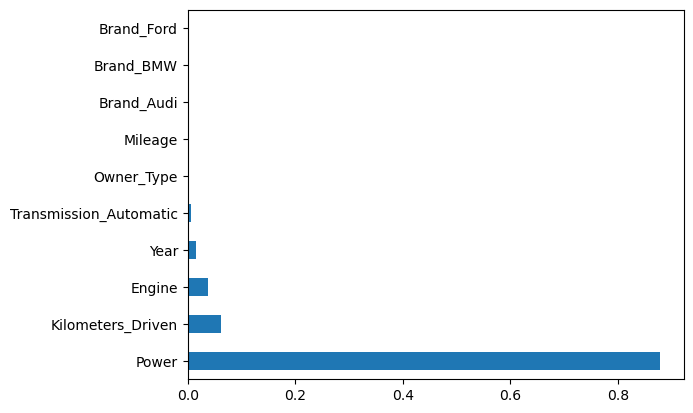

In [102]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=3, criterion='squared_error')
# Good Range of hyper parameter Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
prediction=DT.predict(X_test)
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

The Decision Tree model shows higher accuracy compared to the Linear Regression model. However, the Decision Tree model is overfitted, so we will opt for the Linear Regression model instead. Additionally, "Power," "Kilometers_Driven," and "Engine" are the top three predictors of car price.